In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pandas as pd

In [3]:
df=pd.read_csv('mnist test.csv')

In [24]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [7]:
df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
train_data=pd.read_csv('mnist test.csv')
train_images = train_data.drop('label', axis=1).values
train_labels = train_data['label'].values
train_images = train_images / 255.0
train_labels = to_categorical(train_labels, 10)
test_data = pd.read_csv('mnist test.csv')
test_images = test_data.values
test_images = test_images / 255.0

In [10]:

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(train_images.reshape(-1, 784),train_labels,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
63/63 [==============================] - 3s 12ms/step - loss: 0.8869 - accuracy: 0.7485 - val_loss: 0.2938 - val_accuracy: 0.9175
Epoch 2/10
63/63 [==============================] - 0s 6ms/step - loss: 0.3266 - accuracy: 0.9068 - val_loss: 0.2308 - val_accuracy: 0.9285
Epoch 3/10
63/63 [==============================] - 0s 6ms/step - loss: 0.2395 - accuracy: 0.9286 - val_loss: 0.2018 - val_accuracy: 0.9350
Epoch 4/10
63/63 [==============================] - 0s 6ms/step - loss: 0.1915 - accuracy: 0.9430 - val_loss: 0.1735 - val_accuracy: 0.9445
Epoch 5/10
63/63 [==============================] - 0s 6ms/step - loss: 0.1510 - accuracy: 0.9564 - val_loss: 0.1633 - val_accuracy: 0.9525
Epoch 6/10
63/63 [==============================] - 0s 6ms/step - loss: 0.1240 - accuracy: 0.9651 - val_loss: 0.1726 - val_accuracy: 0.9500
Epoch 7/10
63/63 [==============================] - 0s 6ms/step - loss: 0.0979 - accuracy: 0.9732 - val_loss: 0.1547 - val_accuracy: 0.9555
Epoch 8/10
63/63 [=

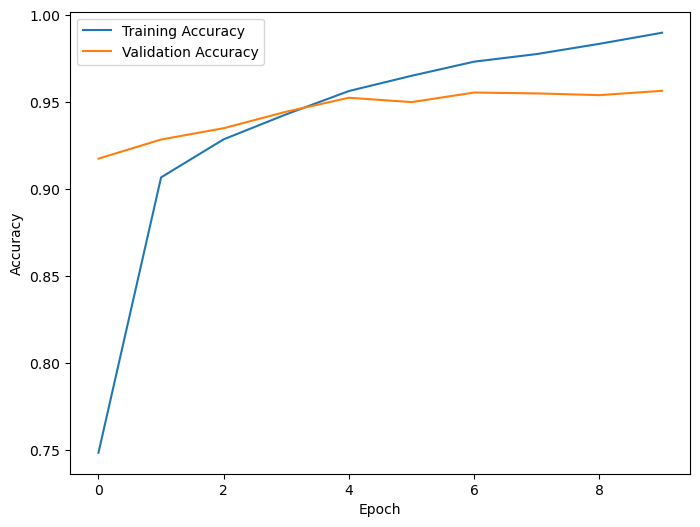

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:

print(test_images.shape)

(10000, 785)


313/313 [==============================] - 1s 2ms/step


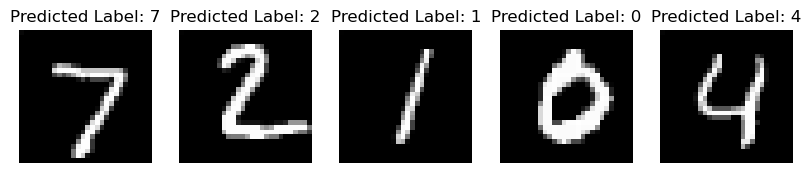

In [22]:
test_images = test_images[:, :784]
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    image = test_images[i][:784].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f'Predicted Label: {predicted_labels[i]}')
    plt.axis('off')

plt.show()